<a href="https://colab.research.google.com/github/Kelvyh/ML2023-KelvyHallyson/blob/main/Trabalho/Mushrooms2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema
O intuito do trabalho foi criar um classificador para classificar um cogumelo como venenoso ou comestível.<br/><br/>
O dataset utilizado pode ser encontrado em:<br/>
https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

##Dataset
O dataset possui 61069 instâncias, 20 features e 1 label. O link acima explica cada uma das colunas do dataset.

#Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVC

#Leitura e análise inicial dos dados

In [2]:
data = pd.read_csv('/content/drive/MyDrive/secondary_data.csv', sep=';')

In [3]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
data.shape

(61069, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

#Removendo Colunas
As seguintes colunas possuem muitos valores faltantes e, não temos como estimá-los com base em outros valores, já que são características particulares dos cogumelos. Teremos que realizar nossa predição com as features restantes.

In [6]:
data.drop(['stem-root', 'veil-type', 'stem-surface', 'veil-color', 'spore-print-color'], axis=1, inplace=True)

In [7]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


In [8]:
data.shape

(61069, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             58598 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

#Escalonando as Features numéricas

### Antes do escalonamento

In [10]:
data[['cap-diameter','stem-height','stem-width']].describe().loc[['min', 'max', 'mean', 'std']]

,cap-diameter,stem-height,stem-width
min,0.380000,0.000000,0.000000
max,62.340000,33.920000,103.910000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955


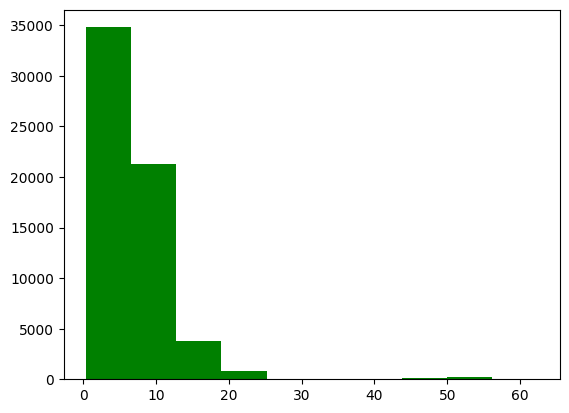

In [11]:
plt.hist(data['cap-diameter'], color='green');

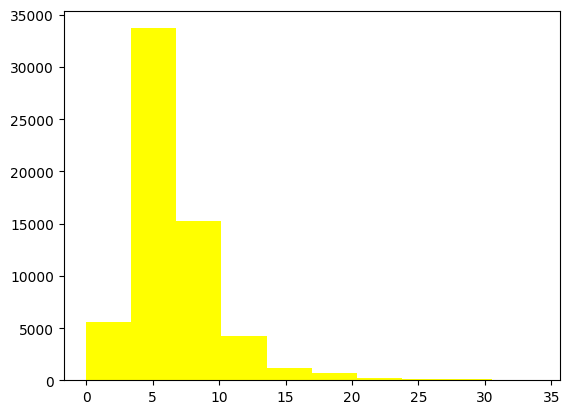

In [12]:
plt.hist(data['stem-height'], color='yellow');

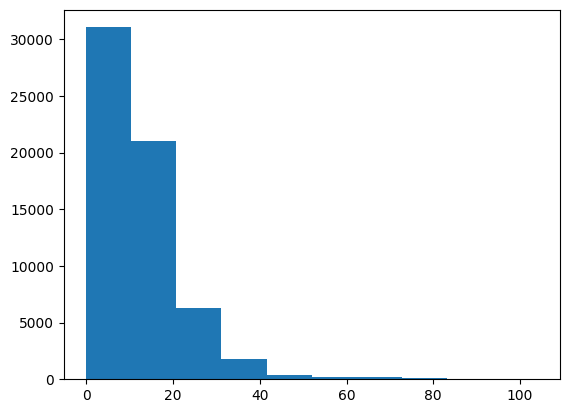

In [13]:
plt.hist(data['stem-width']);

### Depois do escalonamento

In [14]:
sc_norm = MinMaxScaler()
sc_columns = ['cap-diameter','stem-height','stem-width']
for i in sc_columns:
  data[i] = pd.DataFrame(sc_norm.fit_transform(pd.DataFrame(data[i])))

In [15]:
data[['cap-diameter','stem-height','stem-width']].describe().loc[['min', 'max', 'mean', 'std']]

,cap-diameter,stem-height,stem-width
min,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000
mean,0.102548,0.194031,0.116922
std,0.084972,0.099352,0.096583


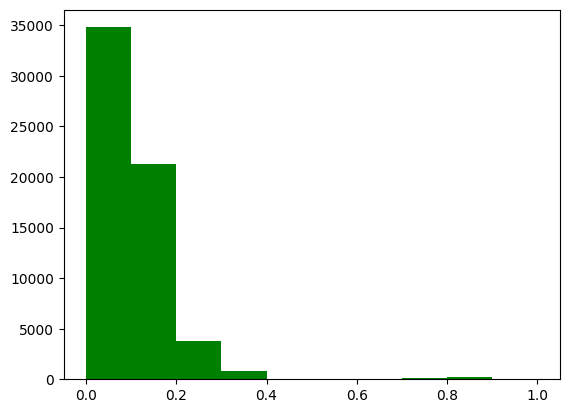

In [16]:
plt.hist(data['cap-diameter'], color='green');

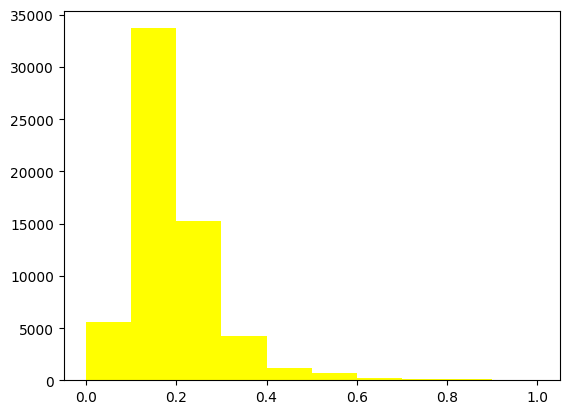

In [17]:
plt.hist(data['stem-height'], color='yellow');

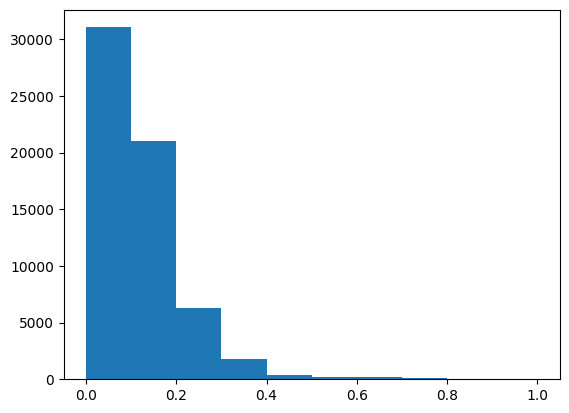

In [18]:
plt.hist(data['stem-width']);

#Vizualição dos dados com Gráfico de Barras

In [19]:
columns = data.columns.tolist()

In [20]:
## Define 13 cores diferentes pois a maior variedade de atributos nas colunas é 13
colors = ['#DEB887', '#FFFF99', '#f7f3e1', '#778899', '#DC143C', '#FFA500', '#0d730d', '#C000C5', '#FF69B4', '#000000', '#F0DC82', '#0000FF', '#75f1ff']

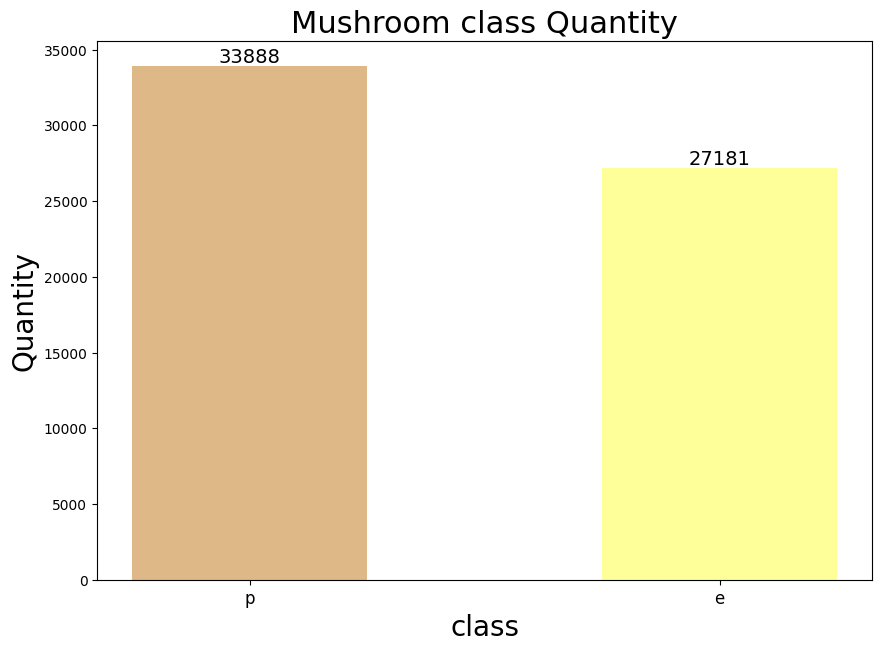

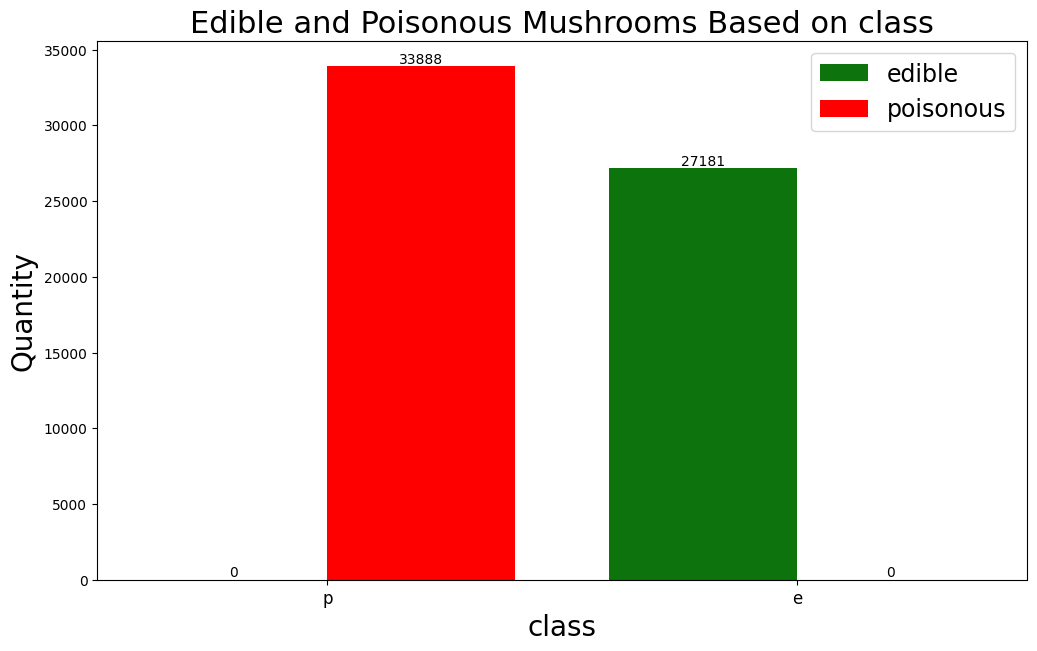

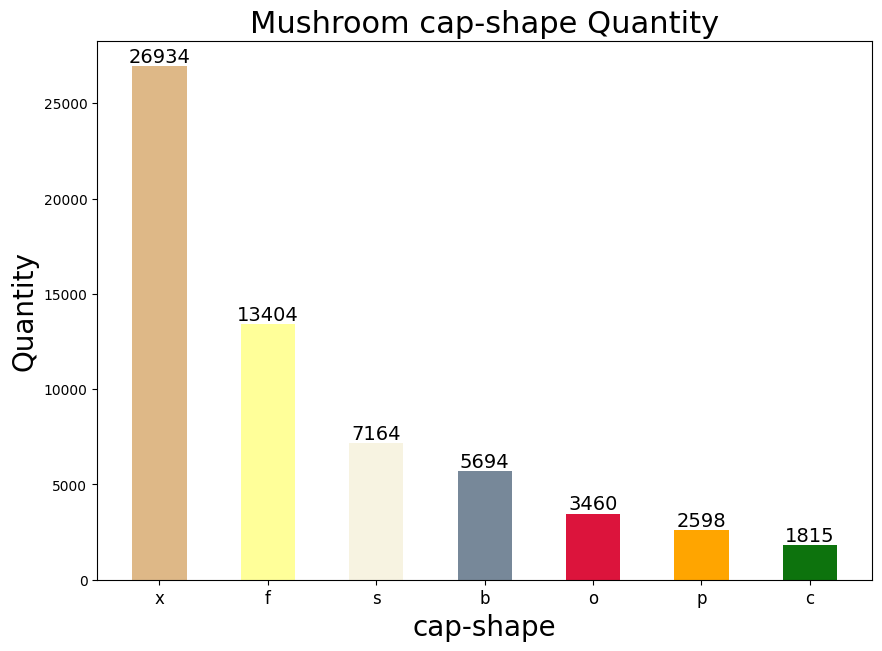

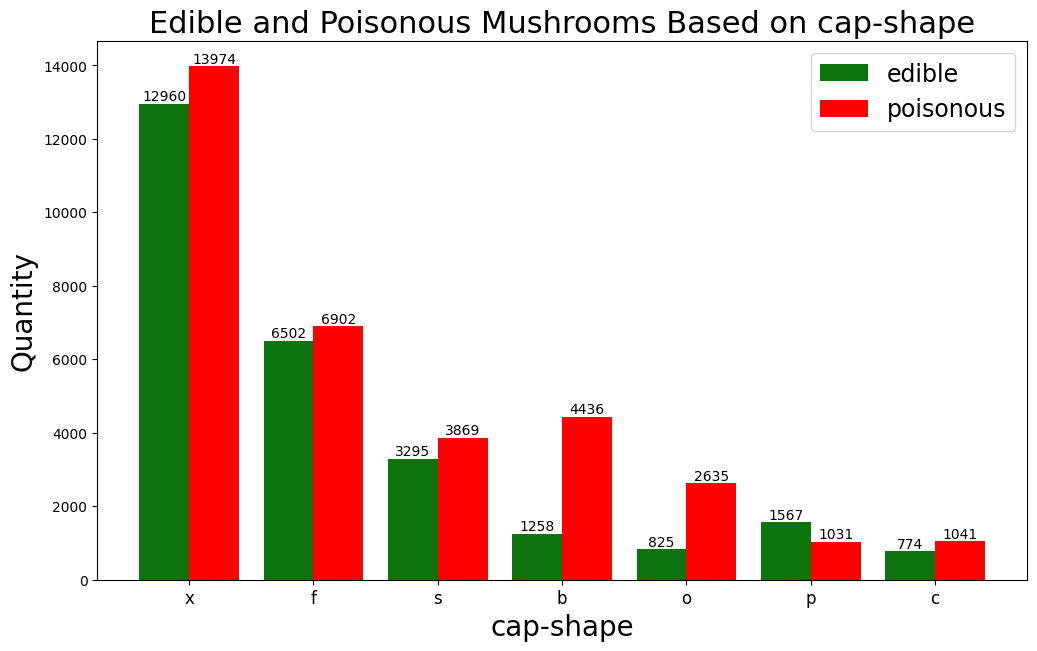

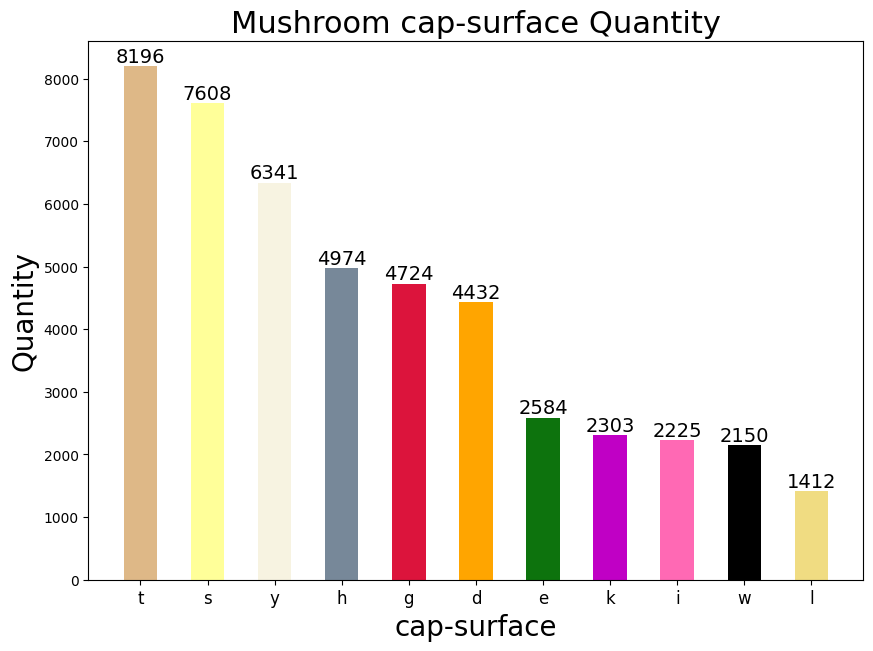

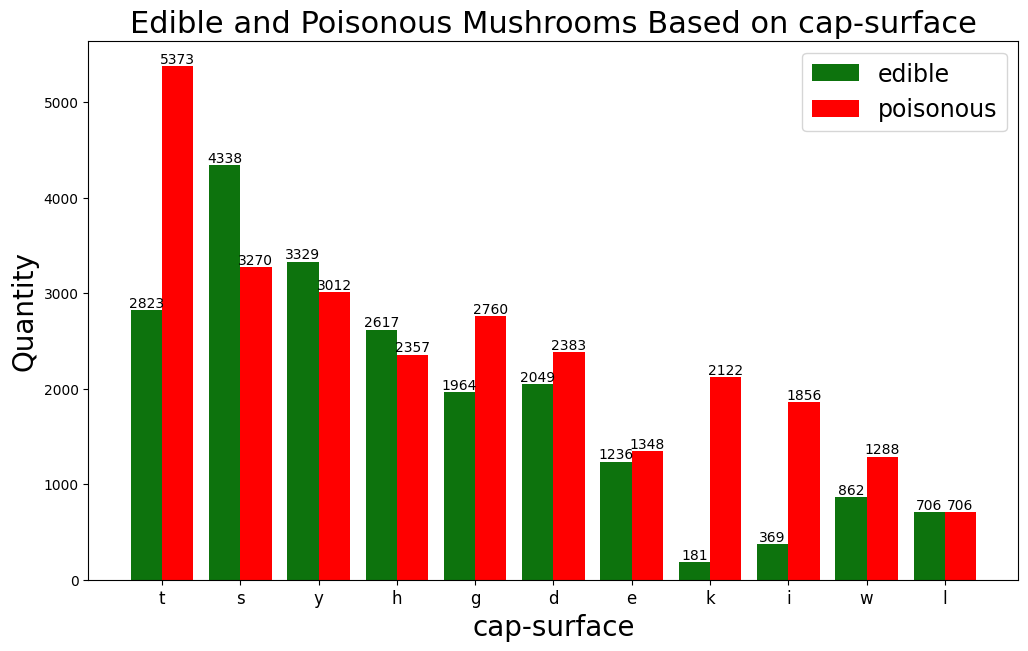

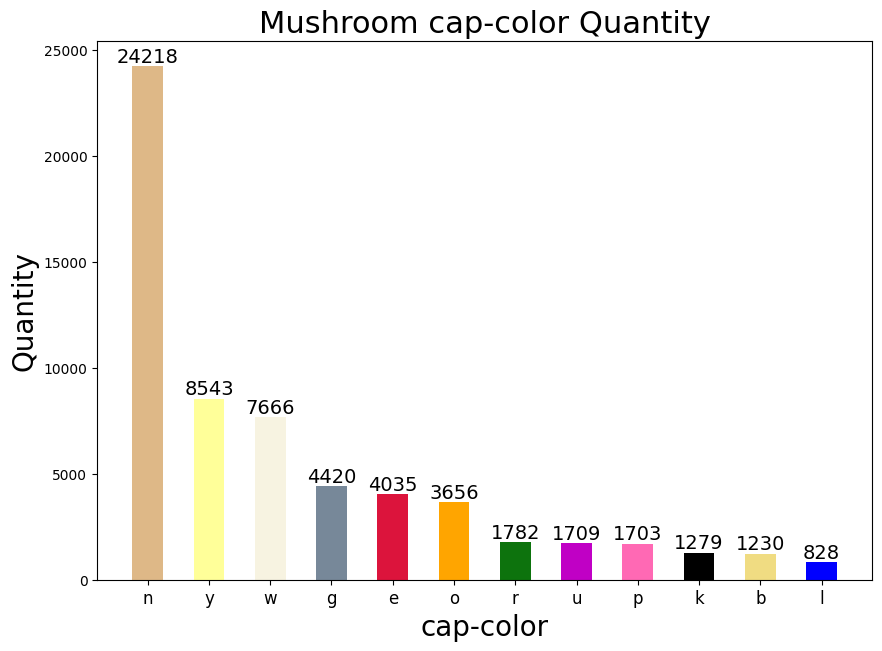

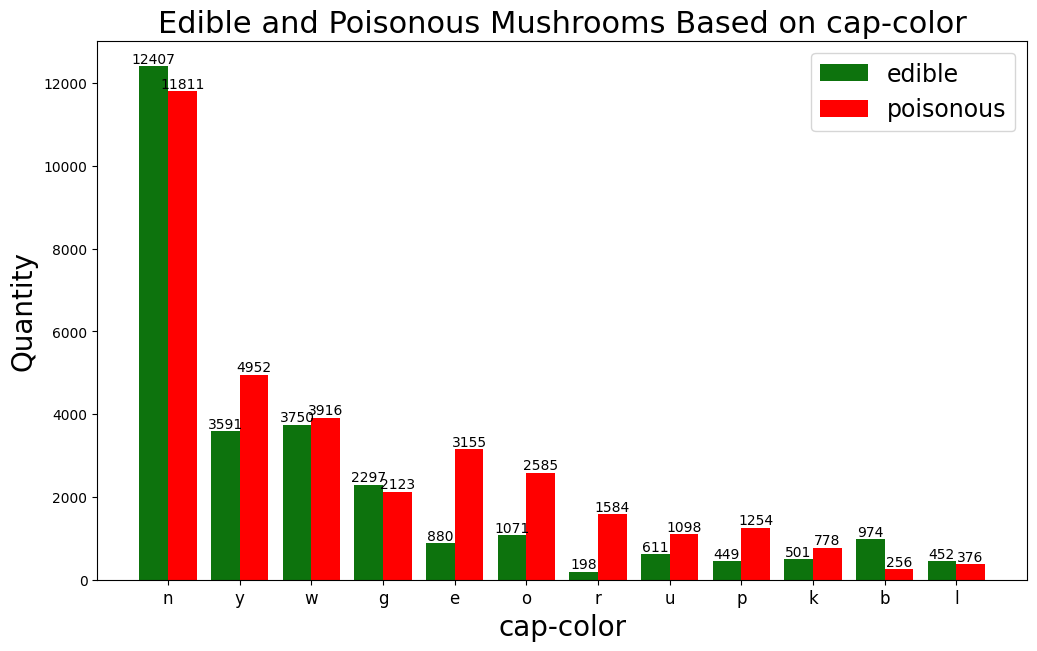

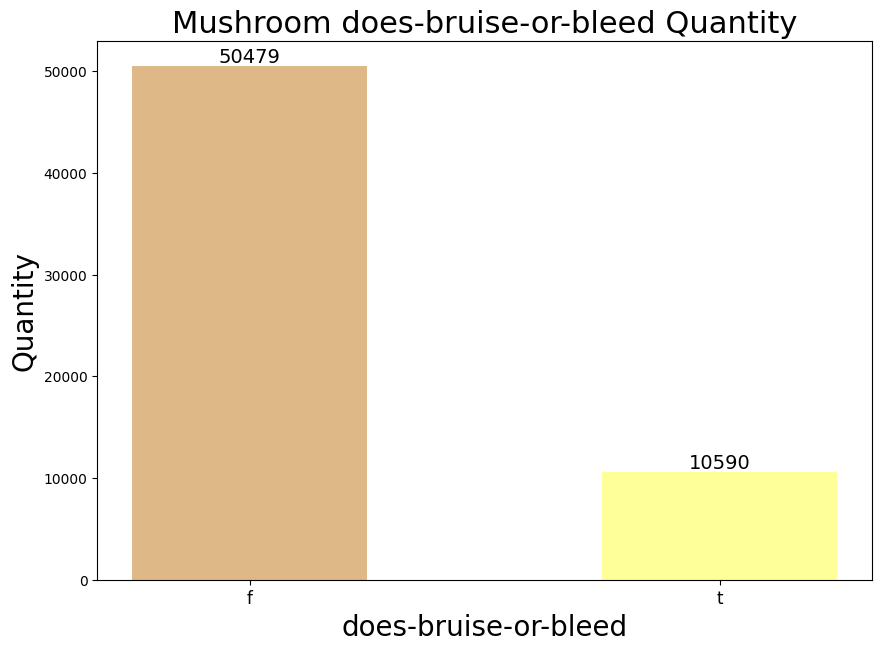

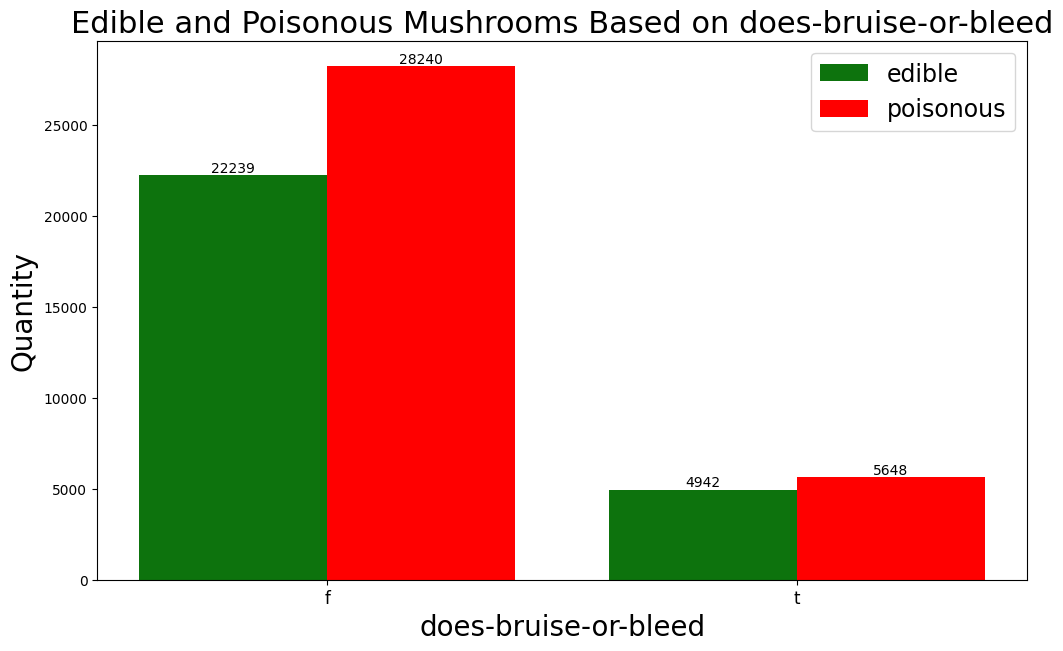

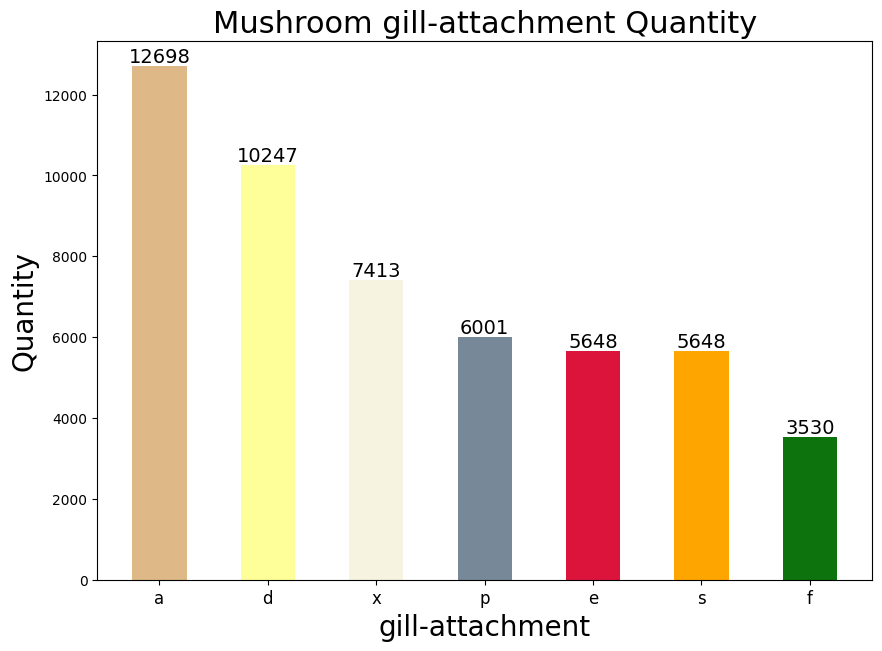

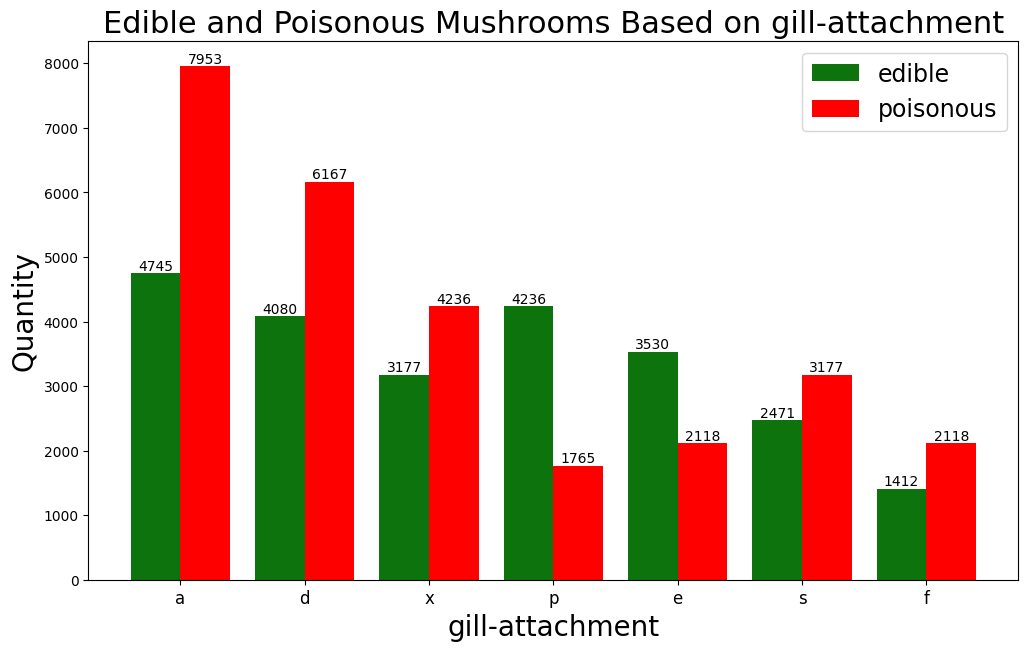

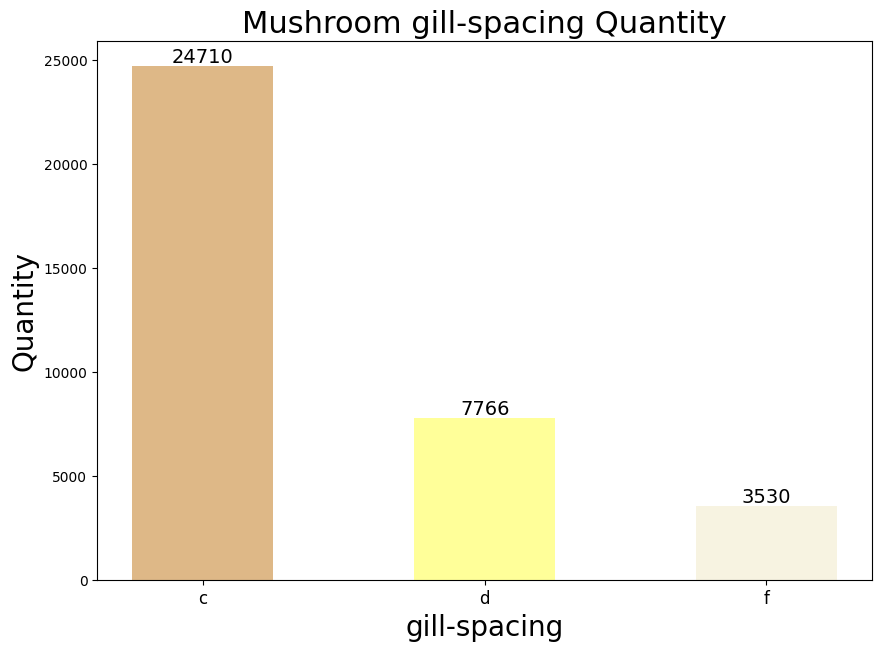

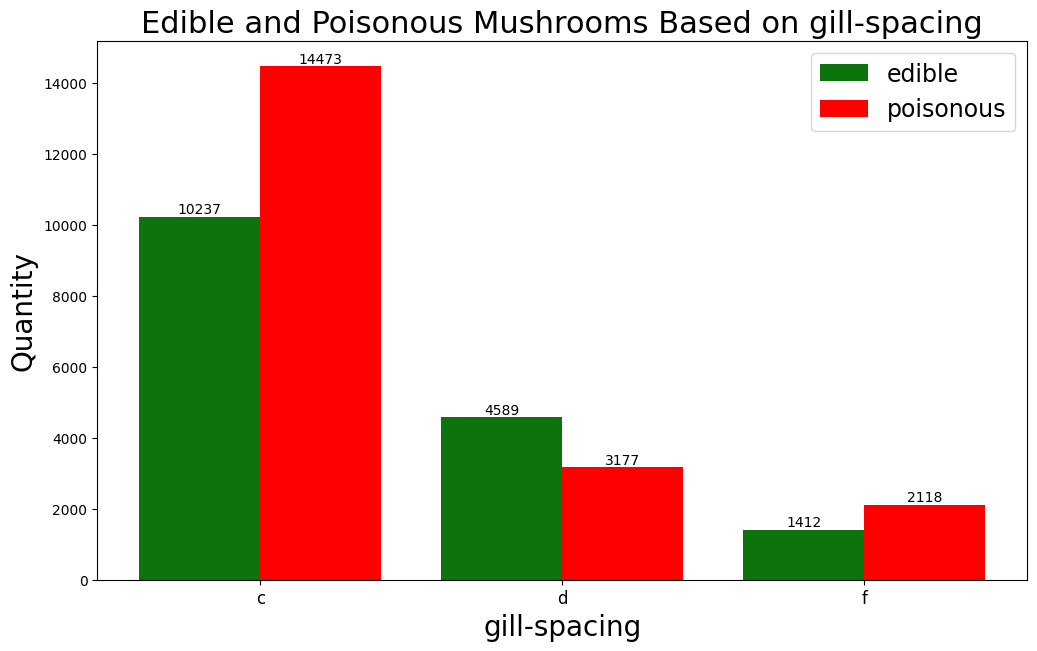

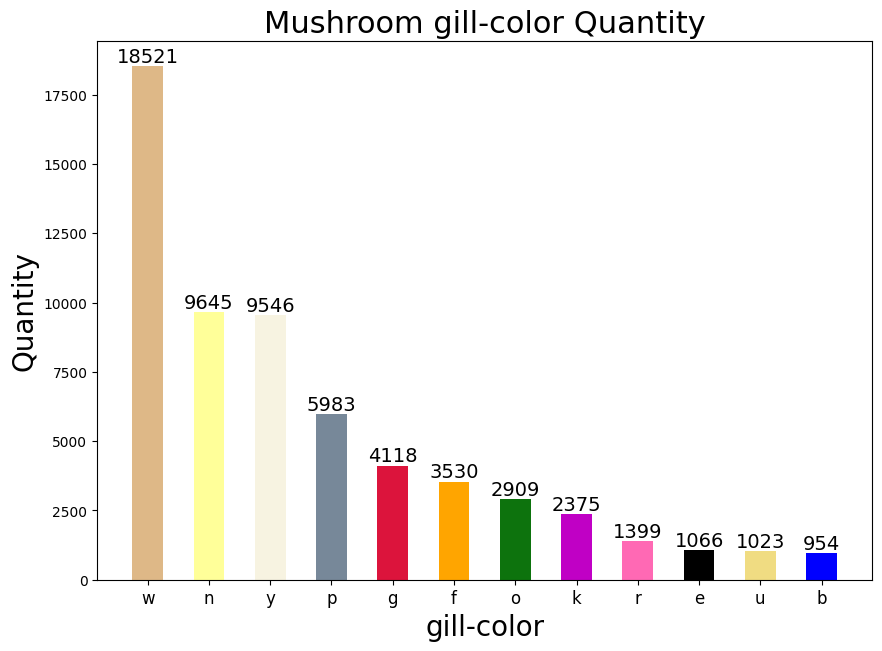

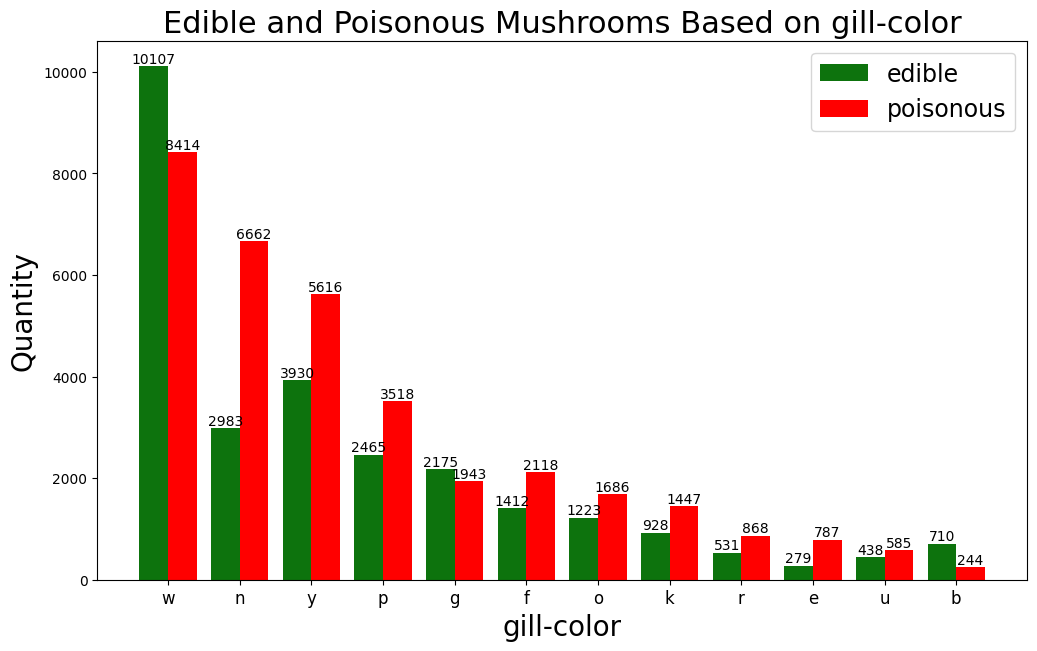

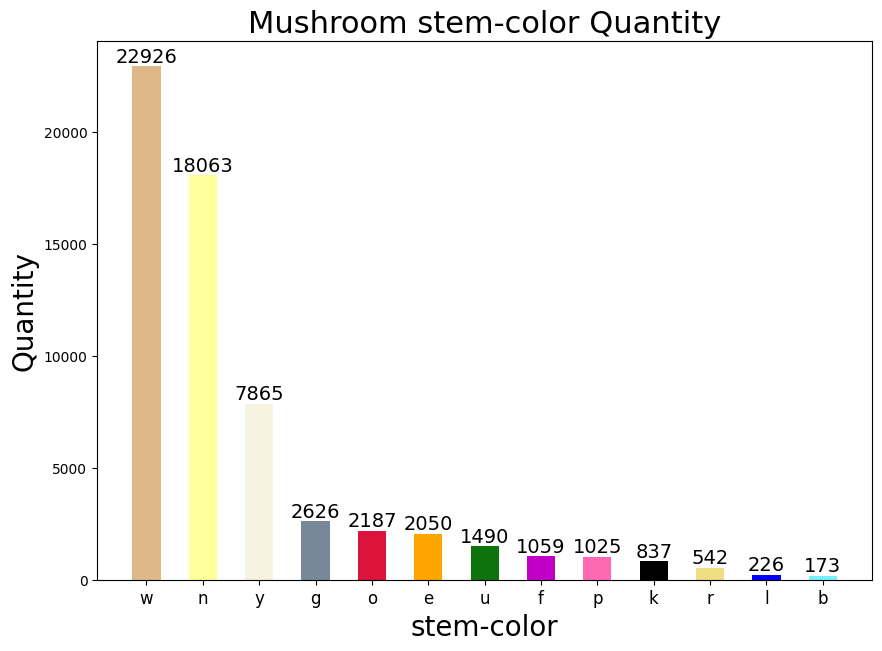

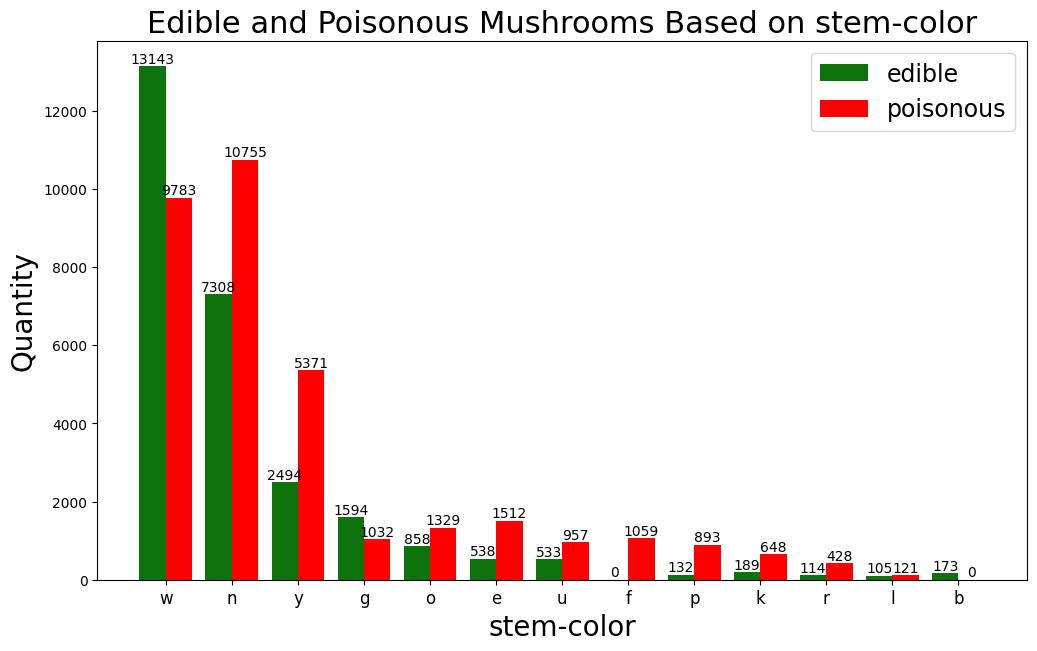

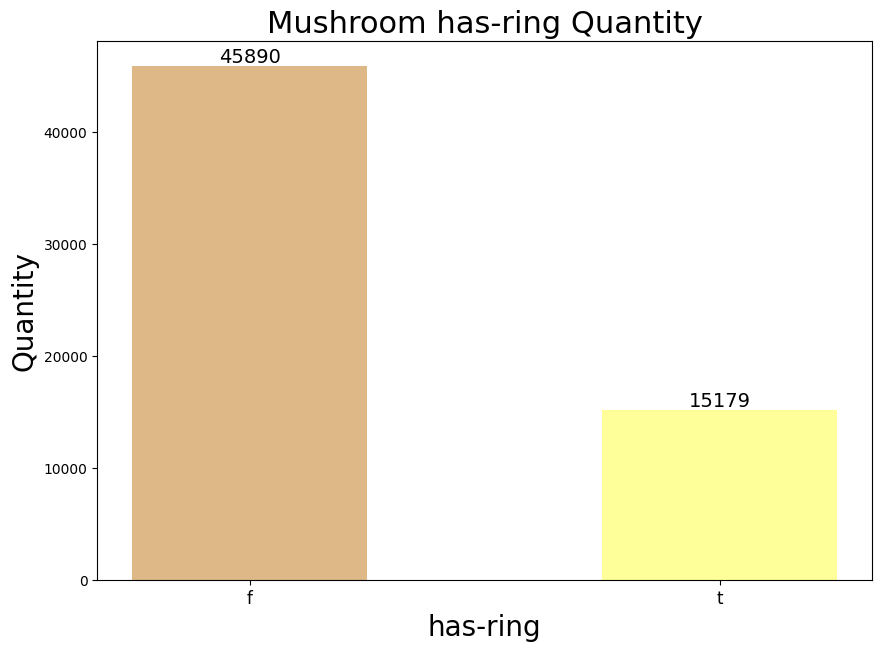

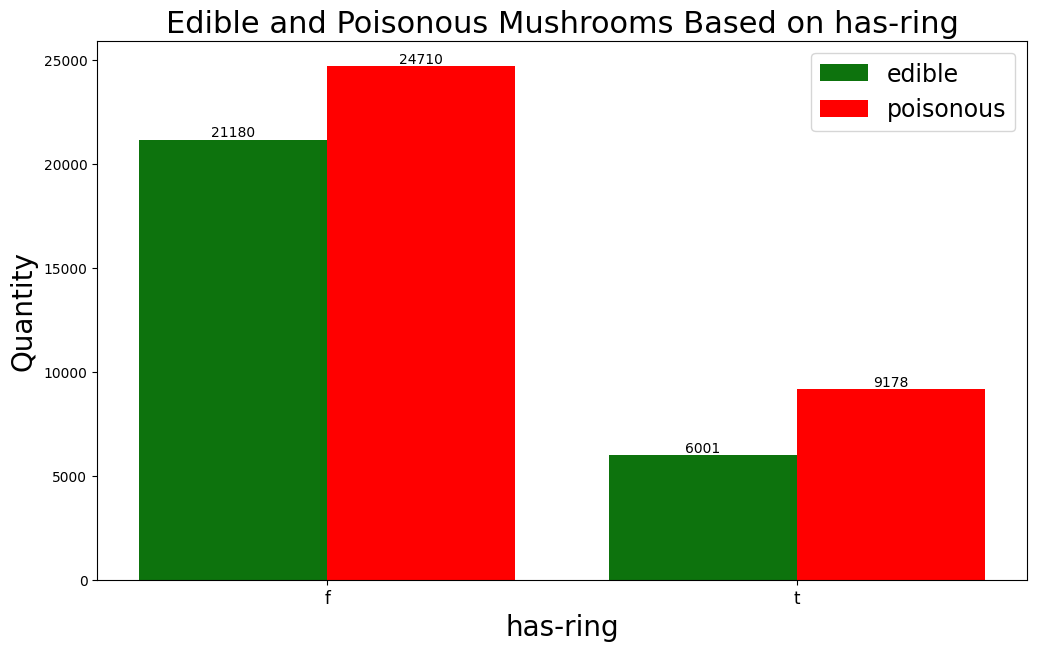

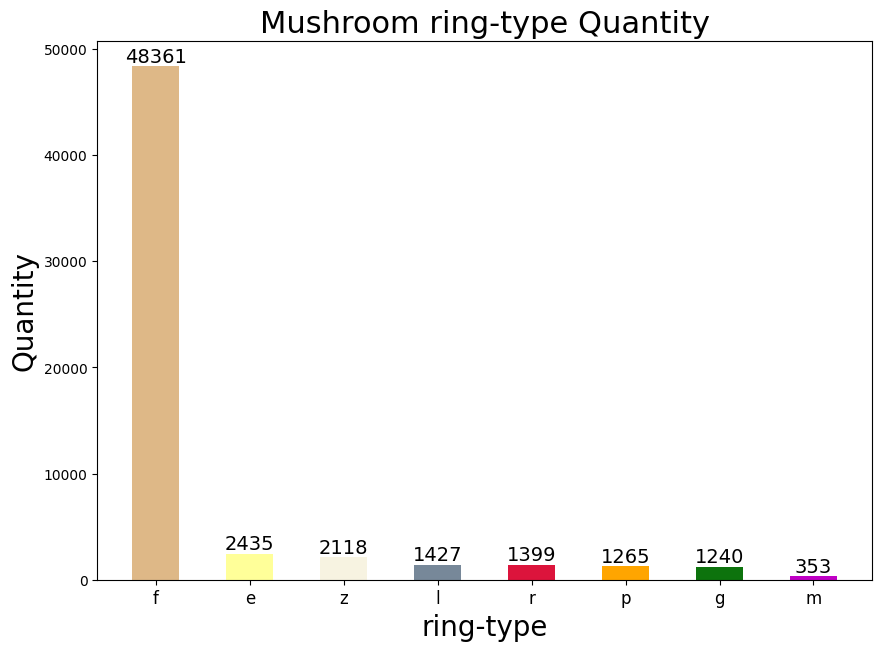

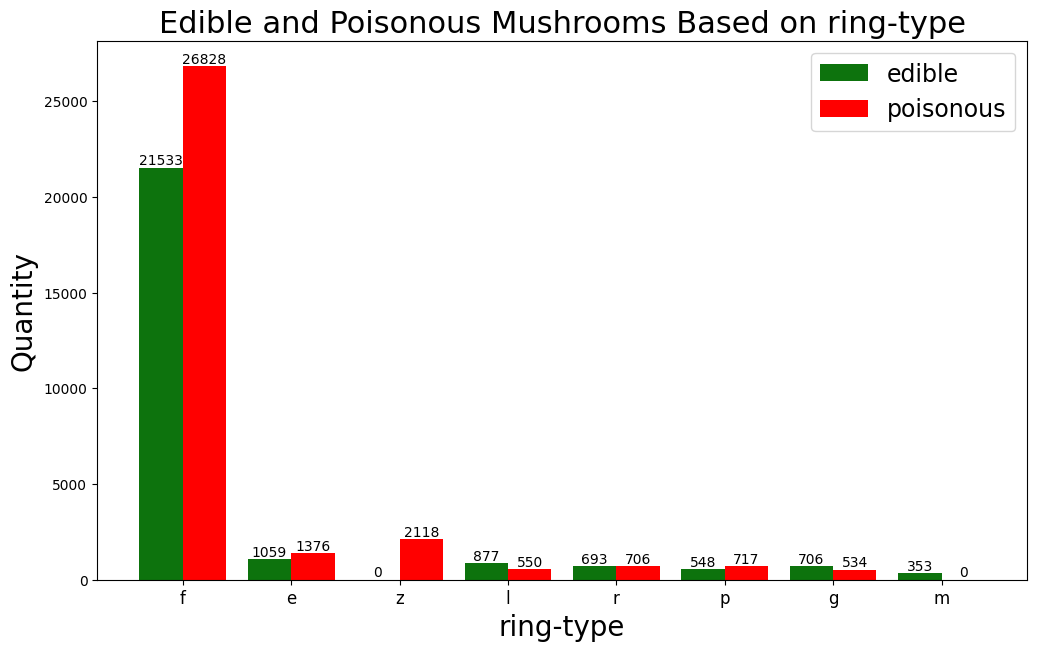

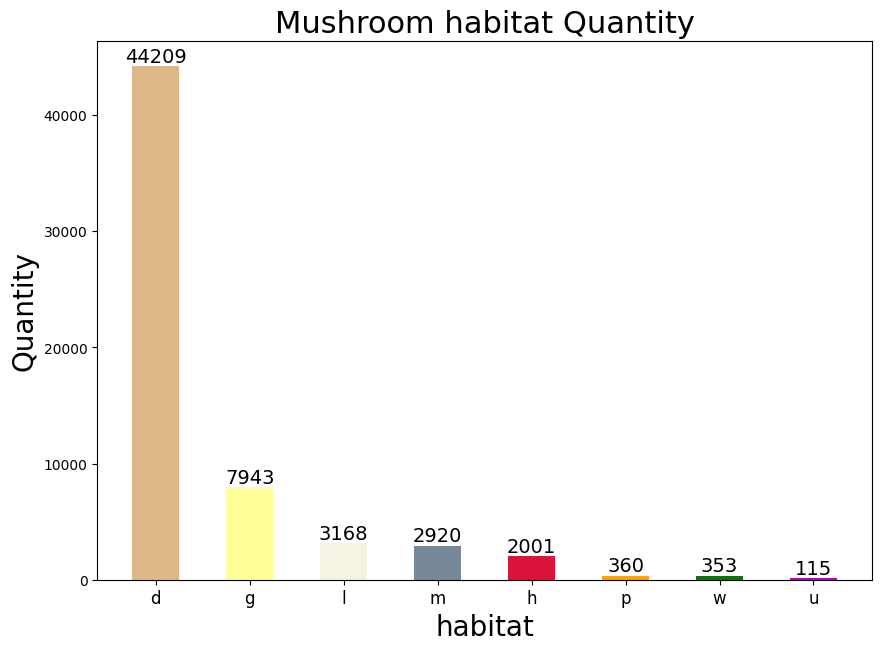

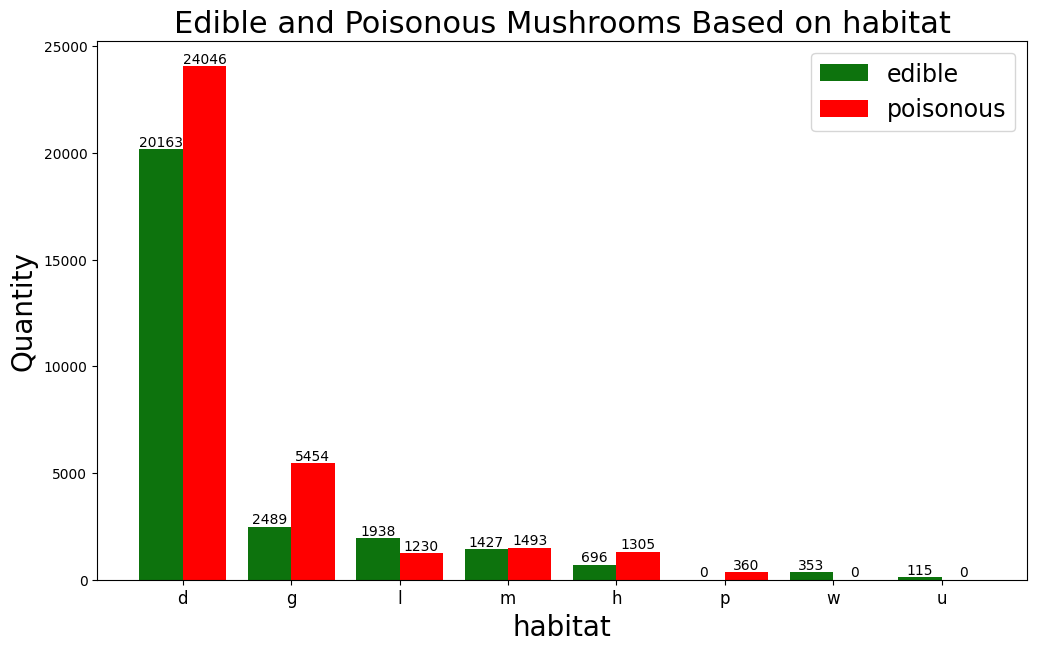

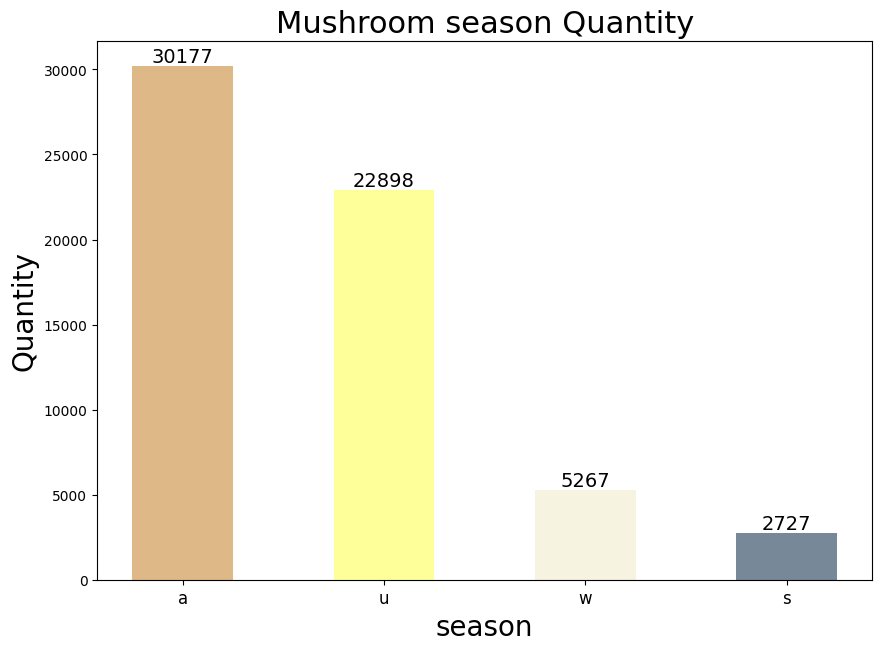

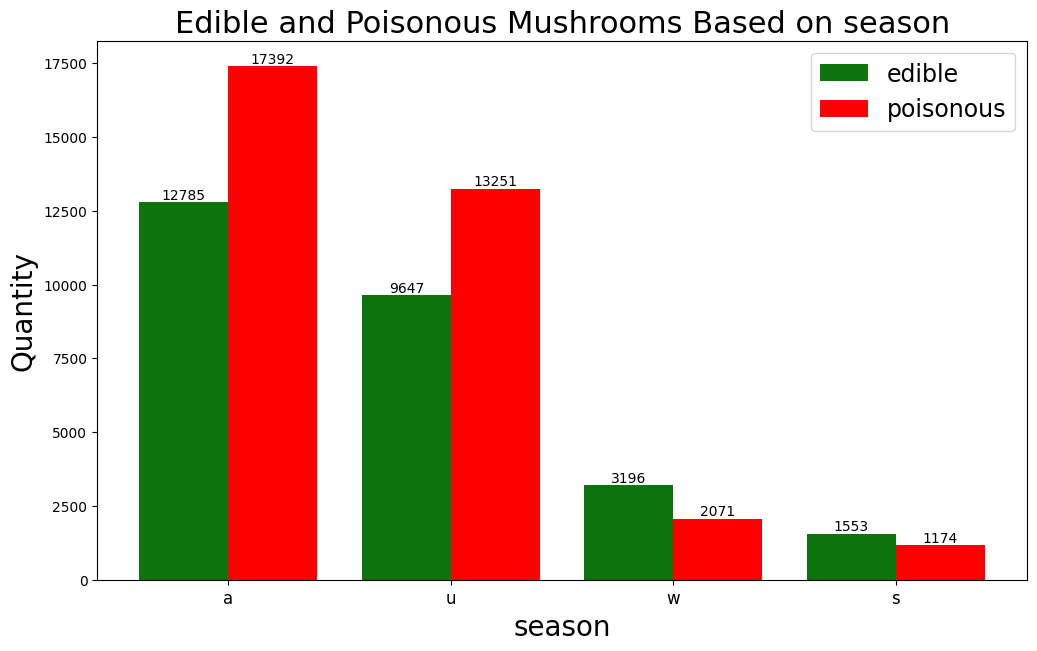

In [21]:
for col in columns:
  if data[col].dtype != 'float64':
    column = data[col].value_counts() # Conta a quantidade de cada ocorrência das intâncias
    column_height = column.values.tolist() # Quantidade de dados por tipo de instância
    column_labels = column.axes[0].tolist()

    ind = np.arange(len(column))  # indices

    width = 0.5
    col_colors = colors[:len(column)]
    fig, ax = plt.subplots(figsize=(10,7))
    mushroom_bars = ax.bar(ind, column_height , width, color=col_colors)
    #Adicionando melhorias para vizualização
    ax.set_xlabel(col,fontsize=20)
    ax.set_ylabel('Quantity',fontsize=20)
    ax.set_title(f'Mushroom {col} Quantity',fontsize=22)
    ax.set_xticks(ind)
    ax.set_xticklabels(column_labels,fontsize = 12)

    def autolabel(rects,fontsize=14):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                    ha='center', va='bottom',fontsize=fontsize)
    autolabel(mushroom_bars)
    plt.show()

    #Divide cada tipo de instância em Venenoso ou Comestível
    poisonous_col = []
    edible_col = []
    for label in column_labels:
        size = len(data[data[col] == label].index)
        edibles = len(data[(data[col] == label) & (data['class'] == 'e')].index)
        edible_col.append(edibles)
        poisonous_col.append(size-edibles)

    width = 0.40
    fig, ax = plt.subplots(figsize=(12,7))
    edible_bars = ax.bar(ind, edible_col , width, color='#0d730d')
    poison_bars = ax.bar(ind+width, poisonous_col , width, color='#FF0000')
    #Adicionando melhorias para vizualização
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('Quantity',fontsize=20)
    ax.set_title(f'Edible and Poisonous Mushrooms Based on {col}',fontsize=22)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(column_labels,fontsize = 12)
    ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
    autolabel(edible_bars, 10)
    autolabel(poison_bars, 10)
    plt.show()

#Preparando os dados para utilizar nos modelos

##Encoder
A maioria dos dados do dataset são categóricos, portanto, vamos utilizar o Label Encoder para transformá-los em valores númericos e o One Hot Encoder para evitar que os modelos percebam ordens inexistentes.

In [22]:
labelencoder=LabelEncoder()
for col in columns:
    data[col] = labelencoder.fit_transform(data[col])

X = data.drop(['class'],axis=1)
Y = data['class']

onehotencoder=OneHotEncoder()
A = onehotencoder.fit_transform(X)

#Dividindo os nossos dados

In [23]:
X_train, X_test, y_train, y_test = train_test_split(A, Y, test_size = 0.2)

#Modelo 1: Decision Tree

In [24]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9205829376125757

#Modelo 2: KNN

In [25]:
# train the k-Nearest Neighbor classifier with the current value of `k`
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X_train, y_train)
# evaluate the model and update the accuracies list
score = model.score(X_test, y_test)
print("k=%d, accuracy=%.2f%%" % (3, score * 100))

k=3, accuracy=99.69%


#Modelo 3: SGD Regression

In [26]:
model = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True,
                     max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None,
                     learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1,
                     n_iter_no_change=5, warm_start=False, average=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [27]:
mean_absolute_error(y_test, y_pred)

0.3434715933546285

#Modelo 4: Linear SVC

In [28]:
lsvc = LinearSVC()

In [29]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

Score:  0.8806058745266605
